In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

symbol = "set50"
df = pd.read_csv("../data/"+symbol+".csv", index_col="Date", parse_dates=True)
df = df["2018":]
short_window = 10
long_window = 20

signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['short_mvg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mvg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:]=np.where(signals['short_mvg'][short_window:] <
                                         signals['long_mvg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

In [18]:
initial_capital = float(1000000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions[symbol] = 100*signals['signal']
portfolio = positions.multiply(df['Close'], axis=0)
pos_diff = positions.diff()
portfolio['holdings']=(positions.multiply(df['Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Close'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

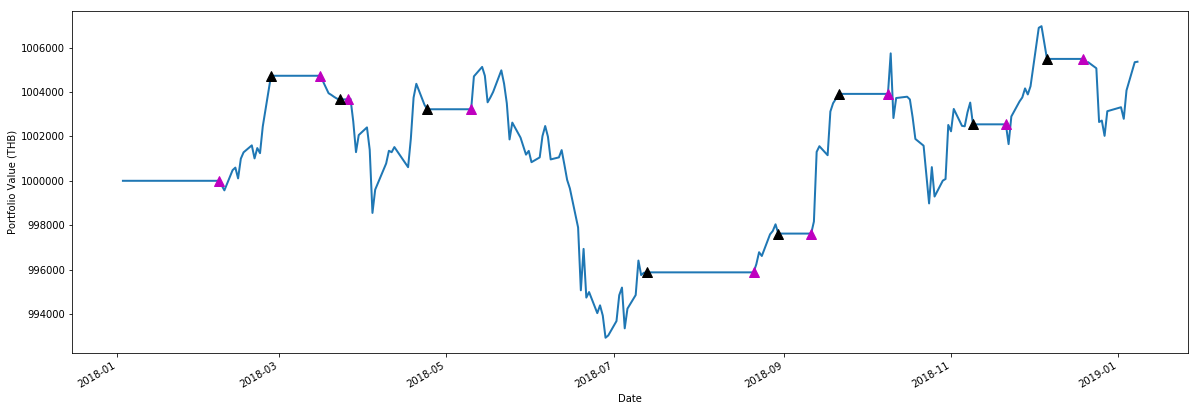

In [19]:
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111, ylabel="Portfolio Value (THB)")
portfolio['total'].plot(ax=ax1, lw=2)
ax1.plot(portfolio.loc[signals.positions==1.0].index,
                        portfolio.total[signals.positions==1.0],
                        '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions==-1.0].index,
                        portfolio.total[signals.positions==-1.0],
                        '^', markersize=10, color='k')
plt.show()